In [5]:
from graphviz import Digraph

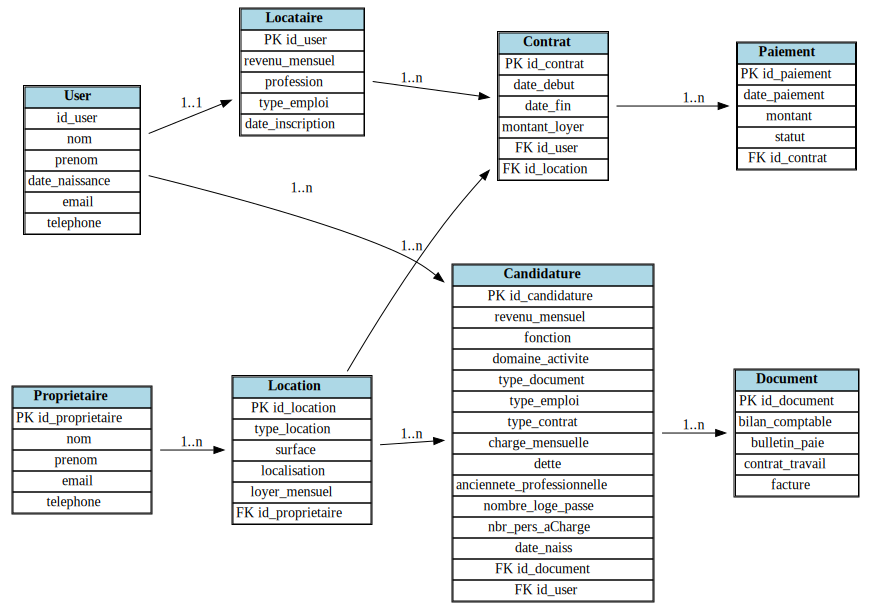

In [14]:
# Création du diagramme
dot = Digraph(comment="ERD Tylimmo - Scoring Locatif")
dot.attr(rankdir='LR', fontsize='10', nodesep='1')

# Fonction pour ajouter une entité
def add_entity(name, attributes):
    label = f"<<TABLE BORDER='1' CELLBORDER='1' CELLSPACING='0'>"
    label += f"<TR><TD BGCOLOR='lightblue'><B>{name}</B></TD></TR>"
    for attr in attributes:
        label += f"<TR><TD>{attr}</TD></TR>"
    label += "</TABLE>>"
    dot.node(name, label=label, shape='plaintext')

# Entités
add_entity("User",[
    "id_user",
    "nom", "prenom", "date_naissance",
    "email", "telephone"
])
add_entity("Candidature", [
    "PK id_candidature",
    "revenu_mensuel", "fonction",
    "domaine_activite", "type_document",
    "type_emploi", "type_contrat", "charge_mensuelle", "dette",
    "anciennete_professionnelle", "nombre_loge_passe", "nbr_pers_aCharge", "date_naiss",
    "FK id_document", "FK id_user"
])
add_entity("Document", [
    "PK id_document",
    "bilan_comptable", "bulletin_paie", "contrat_travail",
    "facture"
])
add_entity("Locataire", [
    "PK id_user",
    "revenu_mensuel", "profession", "type_emploi",
    "date_inscription"
])

add_entity("Proprietaire", [
    "PK id_proprietaire",
    "nom", "prenom", "email", "telephone"
])

add_entity("Location", [
    "PK id_location",
    "type_location", "surface", "localisation",
    "loyer_mensuel", "FK id_proprietaire"
])

add_entity("Contrat", [
    "PK id_contrat",
    "date_debut", "date_fin", "montant_loyer",
    "FK id_user", "FK id_location"
])

add_entity("Paiement", [
    "PK id_paiement",
    "date_paiement", "montant", "statut",
    "FK id_contrat"
])

#add_entity("Score", [
 #   "PK id_score",
  #  "date_calcul", "score",
   # "FK id_locataire"
#])

# Relations avec cardinalités
dot.edge("User", "Locataire", label="1..1")
dot.edge("User", "Candidature", label="1..n")
dot.edge("Proprietaire", "Location", label="1..n")
dot.edge("Location", "Contrat", label="1..n")
dot.edge("Locataire", "Contrat", label="1..n")
dot.edge("Contrat", "Paiement", label="1..n")
dot.edge("Candidature", "Document", label="1..n")
dot.edge("Location", "Candidature", label="1..n")

# Afficher directement dans Jupyter
dot
